# Machine Learning

In [105]:
import pandas as pd
import seaborn

pd.set_option('display.max_columns', None)

In [106]:
df = pd.read_csv('../data/processed/credit-score.csv', index_col='ID')

## Feature Selection

I'll be dropping all the features that I won't be using.

In [107]:
df.drop(columns=['Occupation', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Type_of_Loan', 'Delay_from_due_date',
                 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Amount_invested_monthly',
                 'Monthly_Balance', 'Num_of_Loan', 'Outstanding_Debt', 'Not_Specified', 'Month','Customer_ID', 'Payday_Loan','Auto_Loan','Credit-Builder_Loan','Home_Equity_Loan' ], inplace=True)
df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Personal_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Missed_Payment_Day,Debt_to_Income_Ratio
ID,,,,,,,,,,,,,,,,
0x1602,23.0,19114.12,3.0,4.0,7.0,26.822620,No,49.574949,1,265.0,1,0,0,0,1,0.031124
0x1603,23.0,19114.12,3.0,4.0,6.0,31.944960,No,49.574949,1,266.0,1,0,0,0,0,0.031124
0x1604,23.0,19114.12,3.0,4.0,7.0,28.609352,No,49.574949,1,267.0,1,0,0,0,1,0.031124
0x1605,23.0,19114.12,3.0,4.0,4.0,31.377862,No,49.574949,1,268.0,1,0,0,0,1,0.031124
0x1606,23.0,19114.12,3.0,4.0,6.0,24.797347,No,49.574949,1,269.0,1,0,0,0,1,0.031124


In [108]:
df.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score',
       'Credit_History_Age_Formated', 'Personal_Loan', 'Mortgage_Loan',
       'Student_Loan', 'Debt_Consolidation_Loan', 'Missed_Payment_Day',
       'Debt_to_Income_Ratio'],
      dtype='object')

In [109]:
# Analyze the target variable
import pandas as pd
print(df['Credit_Score'].value_counts())

Credit_Score
 0    53174
-1    28998
 1    17828
Name: count, dtype: int64


## Making Dummies

In [110]:
df = pd.get_dummies(df, drop_first=True)
df.tail()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Personal_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Missed_Payment_Day,Debt_to_Income_Ratio,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,,,,
0x25fe9,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,-1,378.0,0,0,1,0,1,0.01063,False
0x25fea,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,-1,379.0,0,0,1,0,1,0.01063,False
0x25feb,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,-1,380.0,0,0,1,0,1,0.01063,False
0x25fec,25.0,39628.99,4.0,6.0,6.4,33.638208,35.104023,0,381.0,0,0,1,0,1,0.01063,False
0x25fed,25.0,39628.99,4.0,6.0,6.0,34.192463,35.104023,-1,382.0,0,0,1,0,1,0.01063,False


In [111]:
df['Payment_of_Min_Amount_Yes'] = df['Payment_of_Min_Amount_Yes'].astype(int)


In [112]:
df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Personal_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Missed_Payment_Day,Debt_to_Income_Ratio,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,,,,
0x1602,23.0,19114.12,3.0,4.0,7.0,26.822620,49.574949,1,265.0,1,0,0,0,1,0.031124,0
0x1603,23.0,19114.12,3.0,4.0,6.0,31.944960,49.574949,1,266.0,1,0,0,0,0,0.031124,0
0x1604,23.0,19114.12,3.0,4.0,7.0,28.609352,49.574949,1,267.0,1,0,0,0,1,0.031124,0
0x1605,23.0,19114.12,3.0,4.0,4.0,31.377862,49.574949,1,268.0,1,0,0,0,1,0.031124,0
0x1606,23.0,19114.12,3.0,4.0,6.0,24.797347,49.574949,1,269.0,1,0,0,0,1,0.031124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,-1,378.0,0,0,1,0,1,0.010630,0
0x25fea,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,-1,379.0,0,0,1,0,1,0.010630,0
0x25feb,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,-1,380.0,0,0,1,0,1,0.010630,0


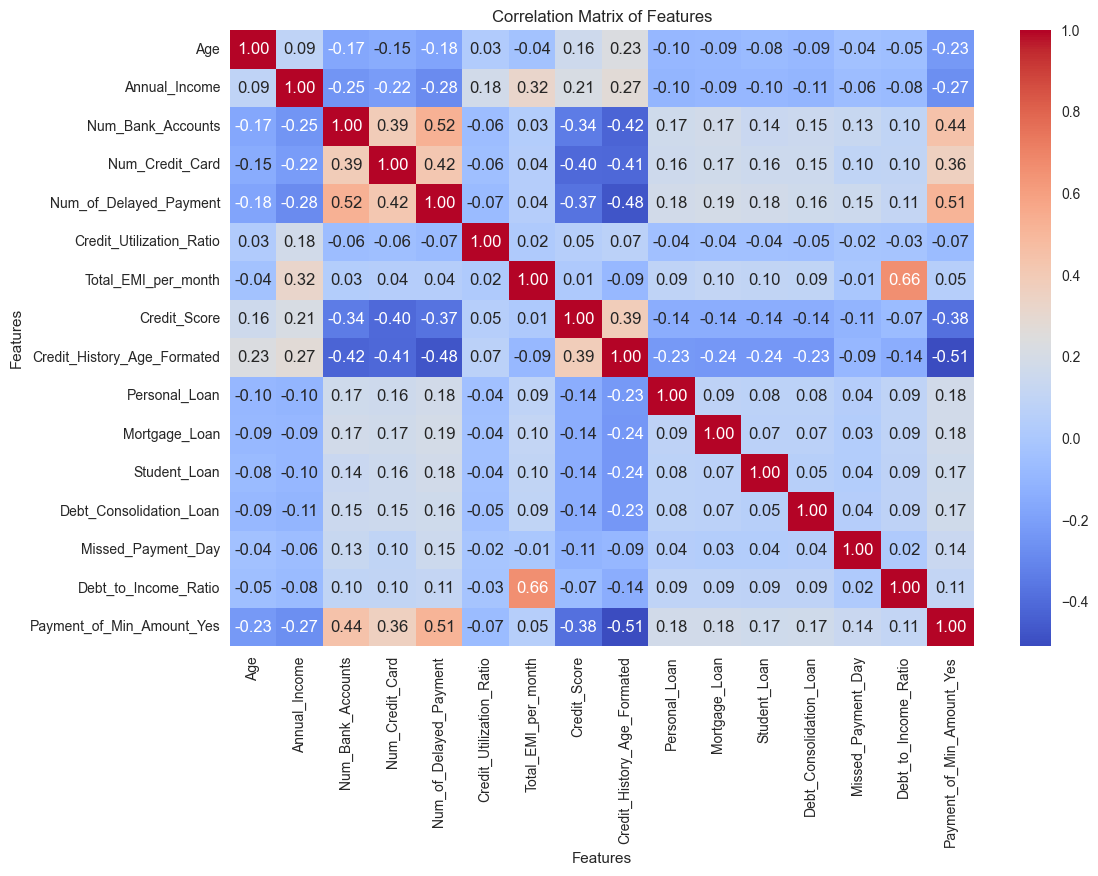

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between features
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [114]:
df.drop(columns=['Personal_Loan','Student_Loan','Debt_Consolidation_Loan',],inplace= True)

In [115]:
y = df.Credit_Score
X = df.drop(columns='Credit_Score')

In [116]:
import pandas as pd
from pycaret.classification import *

In [117]:
clf1 = setup(df, target='Credit_Score', session_id=42)

,Description,Value
0,Session id,42
1,Target,Credit_Score
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(100000, 13)"
5,Transformed data shape,"(100000, 13)"
6,Transformed train set shape,"(70000, 13)"
7,Transformed test set shape,"(30000, 13)"
8,Numeric features,12
9,Preprocess,True


In [129]:
df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Mortgage_Loan,Missed_Payment_Day,Debt_to_Income_Ratio,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,
0x1602,23.0,19114.12,3.0,4.0,7.0,26.822620,49.574949,1,265.0,0,1,0.031124,0
0x1603,23.0,19114.12,3.0,4.0,6.0,31.944960,49.574949,1,266.0,0,0,0.031124,0
0x1604,23.0,19114.12,3.0,4.0,7.0,28.609352,49.574949,1,267.0,0,1,0.031124,0
0x1605,23.0,19114.12,3.0,4.0,4.0,31.377862,49.574949,1,268.0,0,1,0.031124,0
0x1606,23.0,19114.12,3.0,4.0,6.0,24.797347,49.574949,1,269.0,0,1,0.031124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,-1,378.0,0,1,0.010630,0
0x25fea,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,-1,379.0,0,1,0.010630,0
0x25feb,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,-1,380.0,0,1,0.010630,0


In [119]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7883,0.8951,0.7883,0.7880,0.7880,0.6460,0.6462,2.7680
et,Extra Trees Classifier,0.7792,0.8871,0.7792,0.7790,0.7790,0.6311,0.6312,1.4350
knn,K Neighbors Classifier,0.7645,0.8758,0.7645,0.7651,0.7643,0.6097,0.6101,0.1420
dt,Decision Tree Classifier,0.7229,0.7612,0.7229,0.7227,0.7228,0.5384,0.5385,0.1870
xgboost,Extreme Gradient Boosting,0.7115,0.8405,0.7115,0.7105,0.7090,0.5077,0.5096,0.6890
lightgbm,Light Gradient Boosting Machine,0.6775,0.8144,0.6775,0.6751,0.6747,0.4510,0.4524,1.9130
gbc,Gradient Boosting Classifier,0.6472,0.0000,0.6472,0.6439,0.6425,0.3932,0.3959,8.1100
ada,Ada Boost Classifier,0.6091,0.0000,0.6091,0.6065,0.5937,0.3006,0.3119,0.6970
nb,Naive Bayes,0.6068,0.7239,0.6068,0.6143,0.6093,0.3605,0.3614,0.0500
qda,Quadratic Discriminant Analysis,0.6056,0.0000,0.6056,0.6045,0.6043,0.3404,0.3408,0.0570


# Training the Model

In [120]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameter selection
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    # Create a RandomForest model with the selected hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   class_weight='balanced',
                                   random_state=42)
    
    # Use a pipeline to apply StandardScaler and RandomForest
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Train the model on the resampled dataset
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation set
    y_pred = pipeline.predict(X_val)
    
    # Evaluate the model using accuracy
    accuracy = accuracy_score(y_val, y_pred)
    
    # Ağırlıklandırma: Gecikmiş ödeme ve kredi geçmişi özelliklerine ağırlık verebiliriz
    num_delayed_weight = 2  # Gecikmiş ödemeler için ağırlık
    credit_history_weight = 1.5  # Kredi geçmişi için ağırlık
    
    # Özellik değerlerini ağırlıklandır
    weighted_accuracy = accuracy * (1 + 
        num_delayed_weight * np.mean(X_val['Num_of_Delayed_Payment']) + 
        credit_history_weight * np.mean(X_val['Credit_History_Age_Formated'])
    )
    
    return accuracy  # Optuna will try to maximize the accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)



[I 2024-09-25 14:08:01,063] A new study created in memory with name: no-name-011768c2-b2d2-4c97-861a-259e39ebc679
[I 2024-09-25 14:08:25,141] Trial 0 finished with value: 0.79535 and parameters: {'n_estimators': 101, 'max_depth': 40, 'min_samples_split': 9}. Best is trial 0 with value: 0.79535.
[I 2024-09-25 14:08:34,507] Trial 1 finished with value: 0.79565 and parameters: {'n_estimators': 40, 'max_depth': 45, 'min_samples_split': 3}. Best is trial 1 with value: 0.79565.
[I 2024-09-25 14:08:44,371] Trial 2 finished with value: 0.6187 and parameters: {'n_estimators': 77, 'max_depth': 11, 'min_samples_split': 8}. Best is trial 1 with value: 0.79565.
[I 2024-09-25 14:08:46,704] Trial 3 finished with value: 0.7792 and parameters: {'n_estimators': 10, 'max_depth': 32, 'min_samples_split': 5}. Best is trial 1 with value: 0.79565.
[I 2024-09-25 14:09:10,411] Trial 4 finished with value: 0.60795 and parameters: {'n_estimators': 187, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 1 w

Best hyperparameters: {'n_estimators': 140, 'max_depth': 48, 'min_samples_split': 2}


In [121]:
study.best_params

{'n_estimators': 140, 'max_depth': 48, 'min_samples_split': 2}

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create model with best hyperparameters
best_params = study.best_params
best_model = RandomForestClassifier(**best_params, random_state=42)

best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")
print(f"F1-Score (Weighted): {f1}")


Accuracy: 0.8066
Confusion Matrix:
[[4803 1065    6]
 [1187 8683  729]
 [   6  875 2646]]
Precision (Weighted): 0.8064458830734801
Recall (Weighted): 0.8066
F1-Score (Weighted): 0.8064369038021814


In [123]:
from sklearn.model_selection import cross_val_score# Perform 5-fold cross-validation
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')  # Adjust scoring metric as needed
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.61515 0.6241  0.6123  0.61505 0.62295]
Mean Accuracy: 0.61791


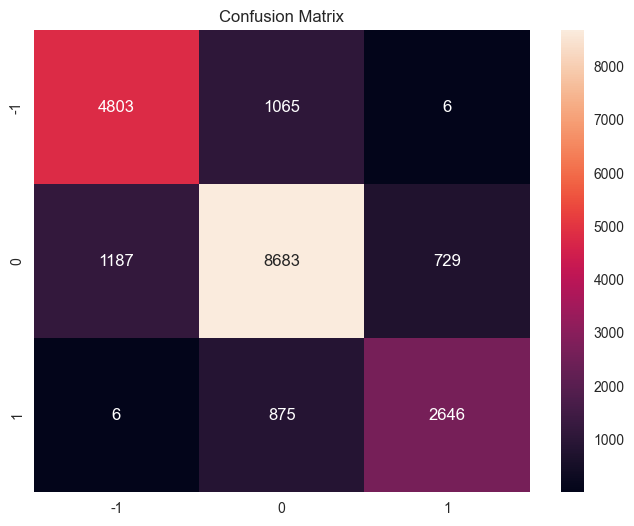

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_val and y_pred are defined
labels = np.unique(y_val)
conf = confusion_matrix(y_val, y_pred)
conf = pd.DataFrame(conf, index=labels, columns=labels)

# Plotting confusion matrix with seaborn
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(conf, annot=True, fmt='.0f')
plt.title('Confusion Matrix')
plt.show()


The dataset is imbalanced and even though I didn't address it, the imbalance didn't seem to have a big impact on the model's predictive capacity.

# Saving the Model

In [126]:
import joblib
import os
import zipfile

# Correct path to your models folder
model_dir = '../models/'

# Ensure the folder exists
os.makedirs(model_dir, exist_ok=True)

# Model file path
model_path = os.path.join(model_dir, 'best_model.pkl')

# Save the model
joblib.dump(best_model, model_path)

# ZIP file path
zip_file_path = os.path.join(model_dir, 'best_model.zip')

# Create a ZIP file
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_path, os.path.basename(model_path))

print("Model file saved successfully.")
print("Zip file created successfully.")




Model file saved successfully.
Zip file created successfully.


In [127]:
df.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Credit_Score', 'Credit_History_Age_Formated',
       'Mortgage_Loan', 'Missed_Payment_Day', 'Debt_to_Income_Ratio',
       'Payment_of_Min_Amount_Yes'],
      dtype='object')

In [128]:
X

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_History_Age_Formated,Mortgage_Loan,Missed_Payment_Day,Debt_to_Income_Ratio,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,
0x1602,23.0,19114.12,3.0,4.0,7.0,26.822620,49.574949,265.0,0,1,0.031124,0
0x1603,23.0,19114.12,3.0,4.0,6.0,31.944960,49.574949,266.0,0,0,0.031124,0
0x1604,23.0,19114.12,3.0,4.0,7.0,28.609352,49.574949,267.0,0,1,0.031124,0
0x1605,23.0,19114.12,3.0,4.0,4.0,31.377862,49.574949,268.0,0,1,0.031124,0
0x1606,23.0,19114.12,3.0,4.0,6.0,24.797347,49.574949,269.0,0,1,0.031124,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,25.0,39628.99,4.0,6.0,7.0,34.663572,35.104023,378.0,0,1,0.010630,0
0x25fea,25.0,39628.99,4.0,6.0,7.0,40.565631,35.104023,379.0,0,1,0.010630,0
0x25feb,25.0,39628.99,4.0,6.0,6.0,41.255522,35.104023,380.0,0,1,0.010630,0
